# Q1) Implement decision tree algorithm on a dataset of your choice 

# Solution:

In [8]:
import numpy as np
import pandas as pd

file_path = "breast_cancer_dataset.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=["target"])
y = df["target"]

def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(X_column, y):
    total_entropy = entropy(y)
    values, counts = np.unique(X_column, return_counts=True)
    weighted_entropy = np.sum([
        (counts[i] / len(y)) * entropy(y[X_column == values[i]])
        for i in range(len(values))
    ])
    return total_entropy - weighted_entropy

def best_split(X, y):
    gains = {col: information_gain(X[col], y) for col in X.columns}
    best_feature = max(gains, key=gains.get)
    return best_feature

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def build_tree(X, y, depth=0, max_depth=5):
    if len(np.unique(y)) == 1:
        return Node(value=y.iloc[0])
    if depth >= max_depth or X.empty:
        return Node(value=y.mode()[0])
    best_feature = best_split(X, y)
    threshold = X[best_feature].median()
    left_indices = X[best_feature] <= threshold
    right_indices = X[best_feature] > threshold
    left_subtree = build_tree(X[left_indices], y[left_indices], depth + 1, max_depth)
    right_subtree = build_tree(X[right_indices], y[right_indices], depth + 1, max_depth)
    return Node(feature=best_feature, threshold=threshold, left=left_subtree, right=right_subtree)

def predict(tree, x):
    if tree.value is not None:
        return tree.value
    if x[tree.feature] <= tree.threshold:
        return predict(tree.left, x)
    else:
        return predict(tree.right, x)

def evaluate(tree, X_test, y_test):
    predictions = X_test.apply(lambda x: predict(tree, x), axis=1)
    return np.mean(predictions == y_test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = build_tree(X_train, y_train, max_depth=5)
accuracy = evaluate(tree, X_test, y_test)


print("Decision Tree Accuracy (ENTROPY):", accuracy)


Decision Tree Accuracy (ENTROPY): 0.9385964912280702


# Q2) Instead of Entropy, use GINI INDEX and observe the performance for any difference(s). 

# Solution:

In [6]:
import numpy as np
import pandas as pd

file_path = "breast_cancer_dataset.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=["target"])
y = df["target"]

def gini_index(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

def information_gain_gini(X_column, y):
    total_gini = gini_index(y)
    values, counts = np.unique(X_column, return_counts=True)
    weighted_gini = np.sum([
        (counts[i] / len(y)) * gini_index(y[X_column == values[i]])
        for i in range(len(values))
    ])
    return total_gini - weighted_gini

def best_split_gini(X, y):
    gains = {col: information_gain_gini(X[col], y) for col in X.columns}
    best_feature = max(gains, key=gains.get)
    return best_feature

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def build_tree_gini(X, y, depth=0, max_depth=5):
    if len(np.unique(y)) == 1:
        return Node(value=y.iloc[0])
    if depth >= max_depth or X.empty:
        return Node(value=y.mode()[0])
    best_feature = best_split_gini(X, y)
    threshold = X[best_feature].median()
    left_indices = X[best_feature] <= threshold
    right_indices = X[best_feature] > threshold
    left_subtree = build_tree_gini(X[left_indices], y[left_indices], depth + 1, max_depth)
    right_subtree = build_tree_gini(X[right_indices], y[right_indices], depth + 1, max_depth)
    return Node(feature=best_feature, threshold=threshold, left=left_subtree, right=right_subtree)

def predict(tree, x):
    if tree.value is not None:
        return tree.value
    if x[tree.feature] <= tree.threshold:
        return predict(tree.left, x)
    else:
        return predict(tree.right, x)

def evaluate(tree, X_test, y_test):
    predictions = X_test.apply(lambda x: predict(tree, x), axis=1)
    return np.mean(predictions == y_test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_gini = build_tree_gini(X_train, y_train, max_depth=5)
accuracy_gini = evaluate(tree_gini, X_test, y_test)

print("Decision Tree Accuracy (GINI):", accuracy_gini)


Decision Tree Accuracy (GINI): 0.9385964912280702


# Q3) Employ SciKit Learn implementation of decision tree and plot it. Observe for any difference(s).

# Solution:

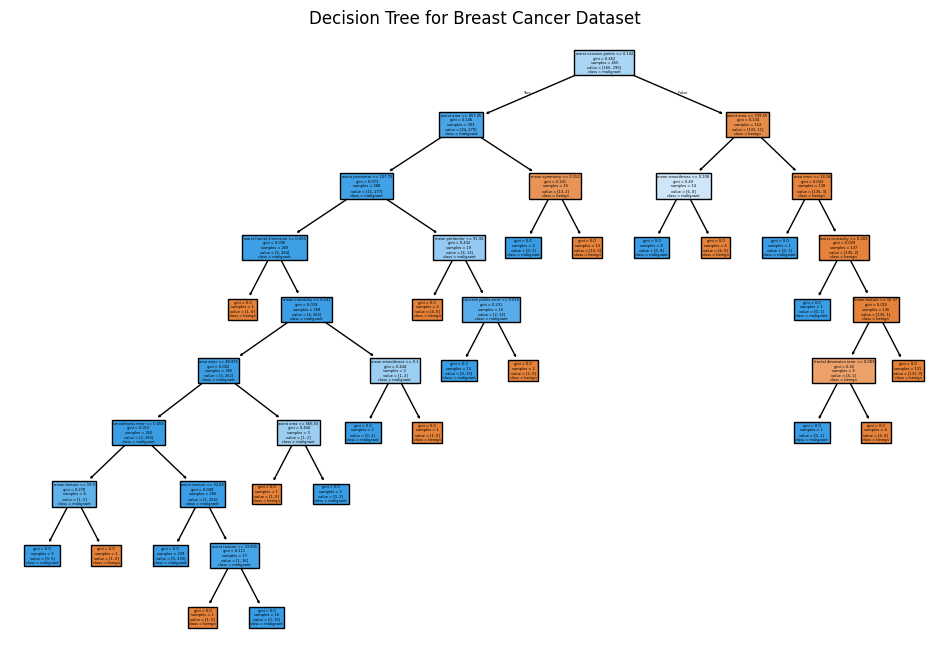

Decision Tree Accuracy: 0.9122807017543859


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

file_path = "breast_cancer_dataset.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=["target"])
y = df["target"]

class_names = ['benign', 'malignant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Decision Tree for Breast Cancer Dataset")
plt.show()

print("Decision Tree Accuracy:", accuracy)
